# Start Of The Deep Learning ERA - BackProp

Implementation of an `autograd engine` to understand `Backpropagation`

The engine performs `Backpropagation`. It calculates the gradient of the weights with respect to the loss function.

Then, it uses the gradient algorithm to `adjust the values of the weights` relative to the loss function so that the `loss moves towards zero`.

---

## Some Stuff You Should Know Before Building Autograd Engine:

### How Backpropagation Is Used In Training Deep Neural Networks?

#### STEPS:

1. **Initialize Parameters:**
   Start by initializing the neural network with random weights. *(Why? Because it helps in breaking the symmetry.)*

2. **Forward Pass:**
   Pass the input data through the network to get the predicted output.

3. **Compute Loss:**
   Calculate the loss by comparing the predicted output with the actual target values.

4. **Backpropagation:**
   Perform backpropagation to calculate the gradient of the loss with respect to each weight in the network.

5. **Update Weights:**
   Use the `gradient algorithm` to adjust the weights based on the calculated gradients, in order to minimize the loss.

6. **Repeat:**
   Repeat steps 2-5 for a set number of epochs or until the loss approaches zero.


### All Math Behind The BackProp

#### 1. Derivation of Addition

![add](../../images/add-1.drawio.png)

Given the equation:

$$
c = a + b
$$

### Finding the Partial Derivative of \( c \) with Respect to \( a \):

We need to find the partial derivative of \( c \) with respect to \( a \):

$$
\frac{\partial c}{\partial a} = \frac{\partial a}{\partial a} + \frac{\partial b}{\partial a}
$$

Since:

$$
\frac{\partial a}{\partial a} = 1
$$

And:

$$
\frac{\partial b}{\partial a} = 0
$$

Therefore:

$$
\frac{\partial c}{\partial a} = 1
$$

### Finding the Partial Derivative of \( c \) with Respect to \( b \):

Next, we find the partial derivative of \( c \) with respect to \( b \):

$$
\frac{\partial c}{\partial b} = \frac{\partial a}{\partial b} + \frac{\partial b}{\partial b}
$$

Since:

$$
\frac{\partial a}{\partial b} = 0
$$

And:

$$
\frac{\partial b}{\partial b} = 1
$$

Therefore:

$$
\frac{\partial c}{\partial b} = 1
$$

---

#### 2. Derivation of Multiplication

![mul](../../images/mul.drawio.png)

Given the equation:

$$
c = a \times b
$$

### Finding the Partial Derivative of \( c \) with Respect to \( a \):

We need to find the partial derivative of \( c \) with respect to \( a \):

$$
\frac{\partial c}{\partial a} = b \frac{\partial a}{\partial a} + a \frac{\partial b}{\partial a}
$$

Since:

$$
\frac{\partial a}{\partial a} = 1
$$

And:

$$
\frac{\partial b}{\partial a} = 0
$$

Therefore:

$$
\frac{\partial c}{\partial a} = b
$$

### Finding the Partial Derivative of \( c \) with Respect to \( b \):

Next, we find the partial derivative of \( c \) with respect to \( b \):

$$
\frac{\partial c}{\partial b} = a \frac{\partial a}{\partial b} + b \frac{\partial b}{\partial b}
$$

Since:

$$
\frac{\partial a}{\partial b} = 0
$$

And:

$$
\frac{\partial b}{\partial b} = 1
$$

Therefore:

$$
\frac{\partial c}{\partial b} = a
$$

---

#### 3. The Chain Rule

Check out this PDF for `BackProp Manually`: [Link](../../01-deep-neural-networks/01-dnn/backprop.pdf)


### Gradient Descent: The MC of Backpropagation

![Gradient Descent](../../images/for_revered_guest.png)

#### Let's Learn How It Works Internally (All The Math):

`J(θ1,θ2) -> J(w,b)`

$$
J(w, b) \text{ is the cost function.}
$$

### Weight Update Rules:

$$
w_i = w_i - \alpha \frac{\partial J}{\partial w_i}
$$

$$
b = b - \alpha \frac{\partial J}{\partial b}
$$

The steps are:
1. **Forward Pass:** Calculate the predicted output.
2. **Calculate Loss:** Compute the loss by comparing the predicted output with the actual target values.
3. **Backpropagation:** Calculate the gradients of the loss with respect to the weights and biases.
4. **Update Weights:** Use the gradients to update the weights and biases using the formulas above.

The `line` on the graph depicts the `gradient descent algorithm`, showing its process of updating parameters to minimize the loss towards zero.

The provided formulas perform all the weight updates.

---

### Read More, Learn More, and Build More:

#### Books:

1. [Machine Learning with PyTorch and Scikit-Learn by Sebastian Raschka](https://www.amazon.in/Machine-Learning-PyTorch-Scikit-Learn-learning-ebook/dp/B09NW48MR1)
2. [Understanding Deep Learning](https://udlbook.github.io/udlbook/)

#### Video Tutorials:

1. [Micrograd by Andrej Karpathy](https://www.youtube.com/watch?v=VMj-3S1tku0)
2. [What is backpropagation really doing? by 3Blue1Brown](https://www.youtube.com/@3blue1brown)


## Now lets Build the Micrograd by Andrej Karpathy (with more functionality): 

In [1]:
!pip3 install graphviz

In [2]:
#import 

import math 
import torch 
import numpy as np
import matplotlib.pyplot as plt
import graphviz


In [3]:
class Tensor:

    def __init__ (self, data, _children=(), _op='', label=''):
        
        self.data = data # data 
        self._op = _op #store the operation (like +,- etc)
        self._prev = set(_children) # where this came from 
        self.grad = 0.0 # default value 
        self._backward = lambda : None # defalut not activated 
        self.label = label # label for the each data point 

    def __add__(self, other):

        other = other if isinstance(other, Tensor) else Tensor(other)

        out = Tensor(self.data + other.data,(self,other),'+') # the other access the other data other than 
                                                              # the self.data = a , other.data = b 
        def _backward():
            self.grad += 1.0 * out.grad 
            other.grad += 1.0 * out.grad
        out._backward = _backward                                                     

        return out 
    
    def __mul__(self, other):

        other = other if isinstance(other, Tensor) else Tensor(other) # if the other object is not tensor then it converts the scalar to tensor

        out = Tensor(self.data * other.data,(self,other),'*')

        def _backward():

            self.grad += other.data * out.grad # L = d * F - > F for mul der 
            other.grad += self.data * out.grad
        out._backward = _backward


        return out 
    
    def tanh(self):
           x = self.data 
           
           t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
           out = Tensor(t, (self, ), 'tanh')
           
           def _backward():
               
               self.grad += (1 - t**2) * out.grad
               
           out._backward = _backward
           
           return out 
      
    def relu(self): # relu 
        x = self.data
        t = np.maximum(0, x)
        out = Tensor(t, (self,), 'relu')

        def _backward():
            self.grad += (t > 0) * out.grad

        out._backward = _backward

        return out 
    
    def gelu(self): # Gelu 
        x = self.data
        t = 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))
        out = Tensor(t, (self,), 'gelu')

        def _backward():
            tanh_out = np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))
            derivative = 0.5 * (1 + tanh_out + x * (1 - np.square(tanh_out)) * (np.sqrt(2 / np.pi) + 0.134145 * np.power(x, 2)))
            self.grad += derivative * out.grad

        out._backward = _backward

        return out
    
    def sigmoid(self):  # sigmoid 
        x = self.data 
        t = 1 / (1 + np.exp(-x))
        out = Tensor(t, (self,), 'sigmoid')

        def _backward():
            self.grad += t * (1 - t) * out.grad

        out._backward = _backward

        return out
    
    def softmax(self):  # softmax 
        x = self.data
        exps = np.exp(x - np.max(x))
        t = exps / np.sum(exps)
        out = Tensor(t, (self,), 'softmax')

        def _backward():
            for i in range(len(t)):
                self.grad[i] += t[i] * (1 - t[i]) * out.grad[i]

        out._backward = _backward

        return out
    
    
    def __rmul__(self,other): # arranging the a * b == b * a 

        return  self * other 
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Tensor(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    
    
    def backward(self):
    
      topo = [] #  list to store nodes in topo order
      visited = set() # Set to track visited nodes
      
      # Helper function to build topological order
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev: # ass : _prev contains parent nodes
            build_topo(child)
          topo.append(v)
          
      build_topo(self) # start building topo order from the current node
     # print(topo)
      # print(visited)
      
      self.grad = 1.0 # initialize the gradient of the final node (self) | so it can avoid zero curse 
      for node in reversed(topo):  # backward pass in topological order
        node._backward()
        
    def __neg__(self): # -self
        return self * -1

    def __radd__(self, other): # other + self
        return self + other

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1
    
    def __repr__(self):

        return f"Tensor(data={self.data})"

#### Test 

In [4]:
a = Tensor(2.0, label='a')
b = Tensor(-3.0, label='b')
c = Tensor(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Tensor(-2.0, label='f')
L = d * f; L.label = 'L'
L

Tensor(data=-8.0)

In [5]:
#did not feel any urge to get my head into this code so just copied from karapathy's repo !!! : ) 

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

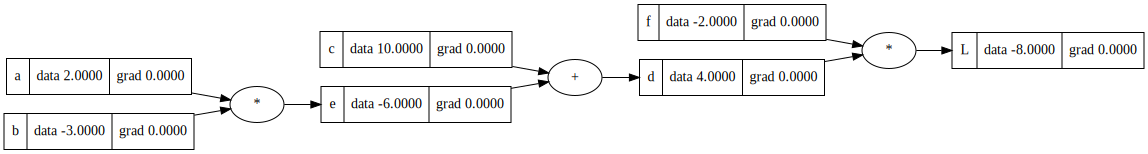

In [6]:
draw_dot(L)

In [7]:
L.backward()

### Now Lets Build the NN 

In [8]:
#inputs x1,x2.. xn 
#wieghts w1,w2.. wn
#inputs * weights + b(acc to no of neuron)
#Neuron 
#MLP 
#Layer 

import random

class Module:

    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0

    def parameters(self):
        return []

class Neuron(Module):

    def __init__(self, nin, nonlin=True):
        self.w = [Tensor(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Tensor(0)
        self.nonlin = nonlin

    def __call__(self, x):
        act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        return act.relu() if self.nonlin else act

    def parameters(self):
        return self.w + [self.b]

    def __repr__(self):
        return f"{'ReLU' if self.nonlin else 'Linear'}Neuron({len(self.w)})"

class Layer(Module):

    def __init__(self, nin, nout, **kwargs):
        self.neurons = [Neuron(nin, **kwargs) for _ in range(nout)]

    def __call__(self, x):
        out = [n(x) for n in self.neurons]
        return out[0] if len(out) == 1 else out

    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]

    def __repr__(self):
        return f"Layer of [{', '.join(str(n) for n in self.neurons)}]"

class MLP(Module):

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1], nonlin=i!=len(nouts)-1) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

    def __repr__(self):
        return f"MLP of [{', '.join(str(layer) for layer in self.layers)}]"
    


# Example

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
np.random.seed(1337)
random.seed(1337)

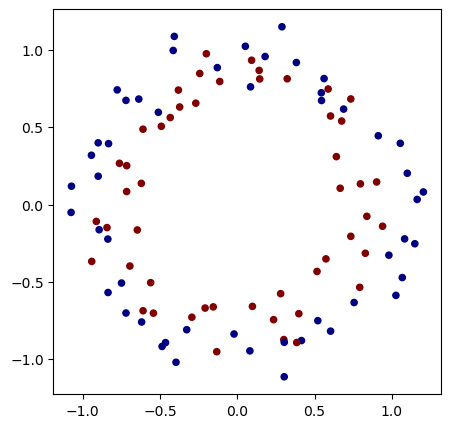

In [11]:
# make up a dataset

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [12]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


In [13]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Tensor, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

# total_loss, acc = loss()
# print(total_loss, acc)

In [14]:
# optimization
for k in range(105):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.9783131125431513, accuracy 50.0%
step 1 loss 0.9405602148989087, accuracy 52.0%
step 2 loss 1.0825364665206025, accuracy 54.0%
step 3 loss 1.5283761947657006, accuracy 50.0%
step 4 loss 1.1845386467329422, accuracy 50.0%
step 5 loss 0.9452578587761957, accuracy 61.0%
step 6 loss 0.9160412209069175, accuracy 60.0%
step 7 loss 0.8903436225716218, accuracy 57.99999999999999%
step 8 loss 0.8737075919768587, accuracy 56.99999999999999%
step 9 loss 0.859931251312081, accuracy 59.0%
step 10 loss 0.847488824333869, accuracy 61.0%
step 11 loss 0.8352891688185367, accuracy 60.0%
step 12 loss 0.8237805005491385, accuracy 66.0%
step 13 loss 0.8078206346772174, accuracy 64.0%
step 14 loss 0.7922728297115906, accuracy 64.0%
step 15 loss 0.7762823392267745, accuracy 66.0%
step 16 loss 0.7582721926977278, accuracy 68.0%
step 17 loss 0.7366545312358684, accuracy 70.0%
step 18 loss 0.7173586139991525, accuracy 72.0%
step 19 loss 0.70352158924323, accuracy 71.0%
step 20 loss 0.7075189981063

(-2.1150408455169534, 2.1349591544830466)

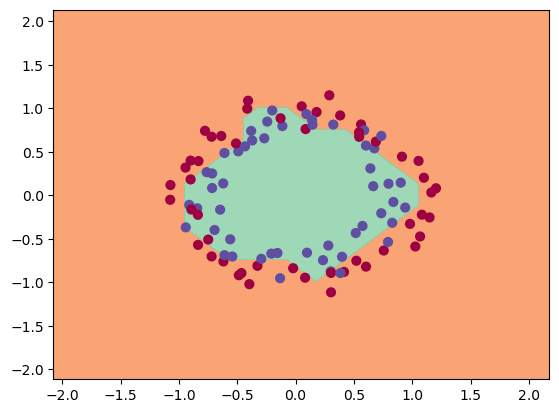

In [18]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Tensor, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Experiments : )

In [16]:
# import math

# class Value:
#     def __init__(self, data, _children=(), _op='', label=''):
    
#         self.data = data
#         self.grad = 0.0
#         self._backward = lambda: None
#         self._prev = set(_children)
#         self._op = _op
#         self.label = label

#     def __repr__(self):
        
#         return f"Value(data={self.data})"

#     def __add__(self, other):
       
#         out = Value(self.data + other.data, (self, other), '+')

#         def _backward():
#             self.grad += 1.0 * out.grad
#             other.grad += 1.0 * out.grad

#         out._backward = _backward

#         return out

#     def __sub__(self, other):
       
#         out = Value(self.data - other.data, (self, other), '-')

#         def _backward():
#             self.grad += 1.0 * out.grad
#             other.grad -= 1.0 * out.grad

#         out._backward = _backward

#         return out

#     def __mul__(self, other):
        
#         out = Value(self.data * other.data, (self, other), '*')

#         def _backward():
#             self.grad += other.data * out.grad
#             other.grad += self.data * out.grad

#         out._backward = _backward

#         return out

#     def __truediv__(self, other):
       
#         out = Value(self.data / other.data, (self, other), '/')

#         def _backward():
#             self.grad += (1 / other.data) * out.grad
#             other.grad -= (self.data / (other.data ** 2)) * out.grad

#         out._backward = _backward

#         return out

#     def __pow__(self, other):
       
#         out = Value(self.data ** other.data, (self, other), '**')

#         def _backward():
#             self.grad += (other.data * (self.data ** (other.data - 1))) * out.grad
#             other.grad += (math.log(self.data) * (self.data ** other.data)) * out.grad

#         out._backward = _backward

#         return out

#     def log(self, base=math.e):
        
#         log_data = math.log(self.data, base)
#         out = Value(log_data, (self,), 'log')

#         def _backward():
#             self.grad += (1 / (self.data * math.log(base))) * out.grad

#         out._backward = _backward

#         return out

#     def sqrt(self):
        
#         sqrt_data = math.sqrt(self.data)
#         out = Value(sqrt_data, (self,), 'sqrt')

#         def _backward():
#             self.grad += (1 / (2 * sqrt_data)) * out.grad

#         out._backward = _backward

#         return out

#     def reset_gradient(self):
        
#         self.grad = 0.0

#     @property
#     def gradient(self):
        
#         topo = []
#         visited = set()

#         def build_topo(v):
#             if v not in visited:
#                 visited.add(v)
#                 for child in v._prev:
#                     build_topo(child)
#                 topo.append(v)

#         build_topo(self)
#         self.grad = 1.0

#         for node in reversed(topo):
#             node._backward()

#         return self.grad

#     @property
#     def computation_graph(self):
        
#         graph = {}
#         topo = []
#         visited = set()

#         def build_topo(v):
#             if v not in visited:
#                 visited.add(v)
#                 for child in v._prev:
#                     build_topo(child)
#                 topo.append(v)

#         build_topo(self)

#         for node in topo:
#             graph[node] = {'op': node._op, 'children': [child for child in node._prev]}

#         return graph


In [19]:
# a = Value(2)
# b = Value(3)
# result = a ** b
# print(result.data) 

In [20]:
# x = Value(10)
# result = x.log()  
# print(result.data)  

# result_base_10 = x.log(10)  
# print(result_base_10.data)  


In [21]:
# y = Value(25)
# result = y.sqrt()
# print(result.data)  


In [22]:
# z = Value(5)
# z.grad = 10  # Set gradient to 10
# print(z.grad) 

# z.reset_gradient()  # Reset gradient to zero
# print(z.grad)  #


In [23]:
# a = Value(2.0, label='a')
# b = Value(-3.0, label='b')
# c = Value(10.0, label='c')
# e = a*b; e.label = 'e'
# d = e + c; d.label = 'd'
# f = Value(-2.0, label='f')
# L = d * f; L.label = 'L'
# L

In [24]:
# graph = L.computation_graph  d
# print(graph)

In [25]:
# x = Value(2)
# y = Value(3)
# z = x + y
# graph = z.computation_graph 
# print(graph)


# This is not the end 